In [3]:
import zipfile
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
with zipfile.ZipFile("transactions.zip", "r") as zip_ref:
    zip_ref.extractall("transactions_data")


In [4]:

file_path = "transactions_data/transactions.txt"
with open(file_path, 'r') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)


# Question 1

In [5]:
print(df.shape)
df.describe(include='all')

(786363, 29)


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
count,786363,786363,786363.000000,786363.000000,786363,786363.000000,786363,786363,786363,786363,...,786363,786363.000000,786363,786363,786363,786363,786363,786363,786363,786363
unique,5000,5000,NaN,NaN,776637,NaN,2490,5,5,6,...,1,NaN,1,1,1,2,1,1,2,2
top,380680241,380680241,NaN,NaN,2016-12-25T14:04:15,NaN,Uber,US,US,05,...,,NaN,,,,False,,,False,False
freq,32850,32850,NaN,NaN,4,NaN,25613,774709,778511,315035,...,786363,NaN,786363,786363,786363,433495,786363,786363,785320,773946
mean,NaN,NaN,10759.464459,6250.725369,NaN,136.985791,NaN,NaN,NaN,NaN,...,NaN,4508.739089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,11636.174890,8880.783989,NaN,147.725569,NaN,NaN,NaN,NaN,...,NaN,6457.442068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,250.000000,-1005.630000,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,5000.000000,1077.420000,NaN,33.650000,NaN,NaN,NaN,NaN,...,NaN,689.910000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,7500.000000,3184.860000,NaN,87.900000,NaN,NaN,NaN,NaN,...,NaN,2451.760000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,15000.000000,7500.000000,NaN,191.480000,NaN,NaN,NaN,NaN,...,NaN,5291.095000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
print(f"Number of records: {len(df)}")
print(f"Number of fields per record: {len(df.columns)}")
print(df.columns.tolist())

Number of records: 786363
Number of fields per record: 29
['accountNumber', 'customerId', 'creditLimit', 'availableMoney', 'transactionDateTime', 'transactionAmount', 'merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits', 'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity', 'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises', 'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud']


Therefore, there are 786,363 records (rows) and 29 fields (columns) in the given transactional data.

Getting a summary of the dataframe for deeper analysis, we sort by null values so we get the most problematic (null-value filled fields) at the top


In [8]:
summary_df = pd.DataFrame({
    'dtype': df.dtypes,
    'nulls': df.isnull().sum(),
    'unique': df.nunique(),
    'min': df.min(),
    'max': df.max(),
    'sample_value': df.iloc[0]
}).sort_values(by='nulls', ascending=False)

summary_df

,dtype,nulls,unique,min,max,sample_value
accountNumber,object,0,5000,100088067,999389635,737265056
customerId,object,0,5000,100088067,999389635,737265056
creditLimit,float64,0,10,250.0,50000.0,5000.0
availableMoney,float64,0,521916,-1005.63,50000.0,5000.0
transactionDateTime,object,0,776637,2016-01-01T00:01:02,2016-12-30T23:59:45,2016-08-13T14:27:32
transactionAmount,float64,0,66038,0.0,2011.54,98.55
merchantName,object,0,2490,1st BBQ,williamssonoma.com,Uber
acqCountry,object,0,5,,US,US
merchantCountryCode,object,0,5,,US,US
posEntryMode,object,0,6,,90,02



# Key insights
- no missing/null values -> no imputation required
- (isFraud):
The target variable — binary but will need to check for imbalance.

- (customerId) and (accountNumber):
Seem to have the same unique value count, max and min values. If they’re always the same, one can be dropped and another could be retained for grouping.

- (creditLimit):
Only 10 unique values => credit tiers. Could be used to build risk profile of the customer based on financial capacity

- (availableMoney), (currentBalance):
A wide numeric range from -1005.63 to 50,000 => high variance => might need scaling. Negative values may flag overdraft situations — potential fraud signals.

- (transactionDateTime):
Currently an object, but should be converted to datetime.Temporal patterns could help detect sudden anomalies.

- (transactionAmount):
Highly variable (up to ~$2000), possibly skewed. Important to normalize.

- (acqCountry, merchantCountryCode):
Mostly "US"? Important to cross-check for cross border fraud.

- (posEntryMode), (posConditionCode), (cardPresent):
Transactions without a card would need separate treatment and others can influence fraud probability as they are related to card presence and usage

- (currentExpDate):
use to compute "time to expiry" => could be potential risk metric

- (accountOpenDate):
use to compute account age in days/months. Older accounts => more reliable.

- (dateOfLastAddressChange):
could compute "time since last address change"=> suggesting possible identity theft

- (cardCVV, enteredCVV), (expirationDateKeyInMatch):
mismatches could indicate potential risk for fraud

- (cardLast4Digits):
could help in clustering similar cards.

- (transactionType):
each type could have a different fraud risk factor, but reversals mostly are potential indicators.

- (echoBuffer), (merchantCity, merchantState, merchantZip), (posOnPremises, recurringAuthInd):
Contains only one unique value which is empty string? — could drop from analysis.

# Validating our assumptions with code

In [9]:
fields_to_check = ['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip',
                   'posOnPremises', 'recurringAuthInd']

for field in fields_to_check:
    print(f"{field}: {df[field].nunique()}")
    print(f"{field} unique values: {df[field].unique()}")

echoBuffer: 1
echoBuffer unique values: ['']
merchantCity: 1
merchantCity unique values: ['']
merchantState: 1
merchantState unique values: ['']
merchantZip: 1
merchantZip unique values: ['']
posOnPremises: 1
posOnPremises unique values: ['']
recurringAuthInd: 1
recurringAuthInd unique values: ['']


In [10]:
(df['customerId'] != df['accountNumber']).sum()

np.int64(0)

We are now sure of what fields are redundant and what to drop during modelling

In [11]:
df['isFraud'].value_counts(normalize=True)

,proportion
isFraud,
False,0.98421
True,0.01579


Highly imbalanced target variable confirmed

In [12]:
print(df['acqCountry'].value_counts(normalize=True))
print(df['merchantCountryCode'].value_counts(normalize=True))

acqCountry
US     0.985180
       0.005801
MEX    0.003980
CAN    0.003083
PR     0.001956
Name: proportion, dtype: float64
merchantCountryCode
US     0.990015
MEX    0.003997
CAN    0.003085
PR     0.001983
       0.000921
Name: proportion, dtype: float64


So US is the most predominant country in the dataset but we might want to check mismatches between the acqCountry and merchantCountryCode for cross border fraud?

In [13]:
(df['acqCountry'] != df['merchantCountryCode']).sum()

np.int64(3911)

It might be useful to look into these transactions to verify the nature of the cross-border transaction- whether it's legitimate or fraudulent.

# Feature Classification & Preprocessing
- Numerical Features: creditLimit, availableMoney, transactionAmount, currentBalance

- Categorical Features:merchantName, acqCountry, merchantCountryCode, posEntryMode, posConditionCode, merchantCategoryCode, transactionType


- ID-like Fields (High Cardinality): accountNumber, customerId, cardCVV, enteredCVV, cardLast4Digits = Categorical; treat as identifiers.
Drop redundant fields (accountNumber ≈ customerId).

- Datetime Features (Need Conversion): transactionDateTime, accountOpenDate, dateOfLastAddressChange, currentExpDate -> Parse to datetime; derive features like account age, time since address change, expiry proximity, and transaction hour.

- Target Variable: isFraud

- Drop Candidates (Empty Fields): echoBuffer, merchantCity, merchantState, merchantZip, posOnPremises, recurringAuthInd
→ Contain only empty strings or single values — can be safely removed.



# Question 2

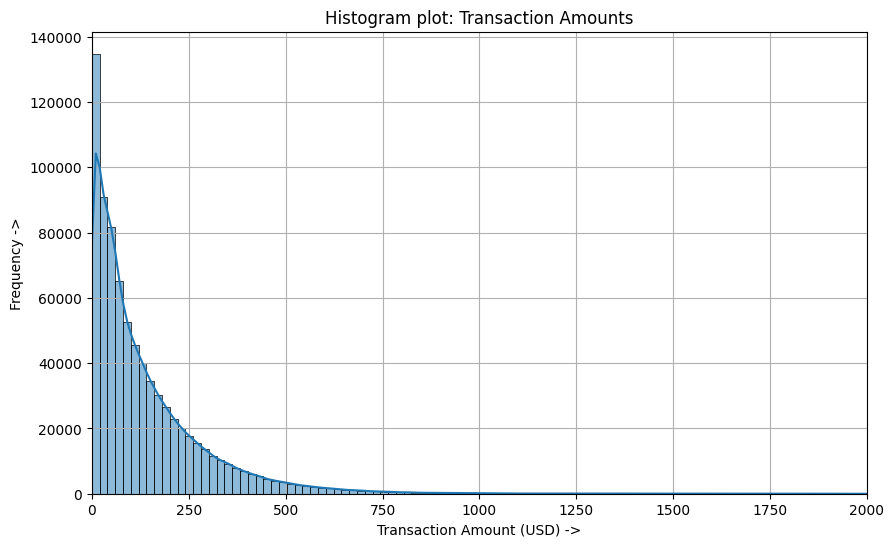

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['transactionAmount'], bins=100, kde=True)
plt.title('Histogram plot: Transaction Amounts')
plt.xlabel('Transaction Amount (USD) ->')
plt.ylabel('Frequency ->')
plt.xlim(0, 2000)
plt.grid(True)
plt.show()

# Removing the outliers

Let's use Tukey's IQR method for this- The general rule is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed. We want to gain a better idea of the patterns in the transaction dataset

In [17]:
Q1 = df['transactionAmount'].quantile(0.25)
Q3 = df['transactionAmount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [19]:
filtered_df = df[
    (df['transactionAmount'] >= lower_bound) &
    (df['transactionAmount'] <= upper_bound)
]



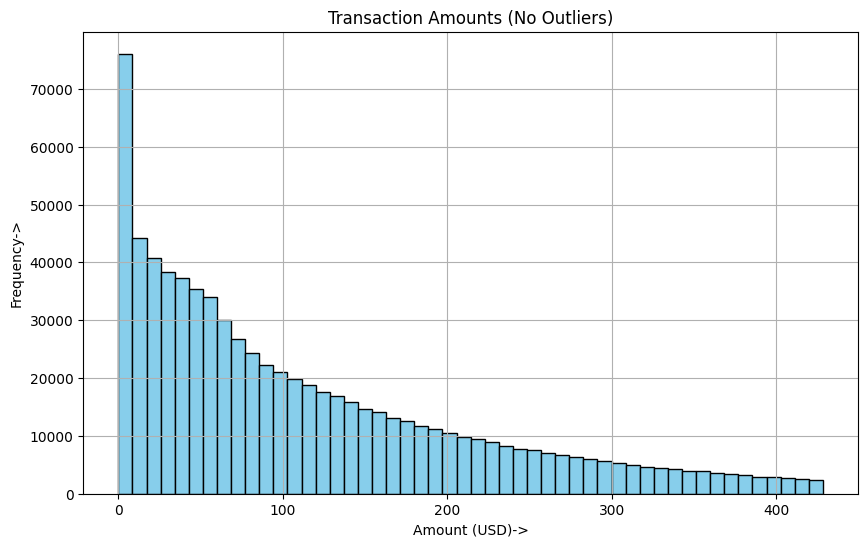

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['transactionAmount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Transaction Amounts (No Outliers)')
plt.xlabel('Amount (USD)->')
plt.ylabel('Frequency->')
plt.grid(True)
plt.show()

Histogram Observations
- The distribution is heavily skewed, with the estimated valid transactions being between [0-500]$
- The peak is in the range of $0–$50, => frequent small purchases (e.g., online payments, subscriptions, rideshares).

- The graph tapers off from $500, towards high-value transactions.

My inference:

Fraud detection: Extremely low or high transaction amounts might be useful fraud indicators. Low amounts could be tester amounts before fraud is committed and large amounts could be potential fraud.

We could use these stats for a Risk Profile creation:-

Idea: Identify transaction ranges for each user to build behavioral baseline

Approach: Compute median and standard deviation of transaction amounts per customer. Then, cluster customers into segments (e.g., low, medium, high spenders) using k-means.


# Question 3

Let me convert to datetime from object as previously noticed in pre-processing step and sort by customer and merchant so we can easily see the transactions

In [7]:
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])

df_sorted = df.sort_values(by=['customerId', 'merchantName', 'transactionDateTime'])
df_sorted

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
541917,100088067,100088067,50000.0,49953.81,2016-04-08 19:56:36,200.12,1st BBQ,US,US,09,...,,46.19,,,,True,,,False,False
541962,100088067,100088067,50000.0,49929.31,2016-11-09 07:26:06,95.11,1st Pub,US,US,02,...,,70.69,,,,True,,,False,False
541920,100088067,100088067,50000.0,49996.04,2016-05-06 02:54:01,5.26,1st Sandwitch Bar #758805,US,US,02,...,,3.96,,,,True,,,False,False
541904,100088067,100088067,50000.0,49933.93,2016-02-03 04:48:54,141.60,34th BBQ #412895,US,US,09,...,,66.07,,,,True,,,False,False
541925,100088067,100088067,50000.0,50000.00,2016-06-03 18:50:55,304.15,AMC #191138,US,US,02,...,,0.00,,,,True,,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108113,999389635,999389635,5000.0,4674.08,2016-10-23 16:47:41,4.62,Play Store,US,US,05,...,,325.92,,,,False,,,False,False
108114,999389635,999389635,5000.0,4694.46,2016-11-24 00:21:46,4.62,Play Store,US,US,05,...,,305.54,,,,False,,,False,False
108115,999389635,999389635,5000.0,4714.84,2016-12-24 05:19:30,4.62,Play Store,US,US,05,...,,285.16,,,,False,,,False,False
108109,999389635,999389635,5000.0,4943.92,2016-08-04 20:27:36,42.98,oldnavy.com,US,US,09,...,,56.08,,,,False,,,False,False


"reversal" follows a normal transaction with the same customerId, merchantName, and transactionAmount so let me find duplicates with those 3 fields, keeping the first as normal and following ones as reversals.

In [9]:
# grouping based on customerId, transactionAmount, and merchantName (since accountNumber number is same as customerId)
duplicated = df[df.duplicated(['customerId', 'transactionAmount', 'merchantName'], keep=False)]
purchase_trans = duplicated[duplicated.transactionType == 'PURCHASE']
rev_trans = duplicated[duplicated.transactionType == 'REVERSAL']


reversed_trans = pd.merge(purchase_trans, rev_trans, on=['customerId', 'transactionAmount', 'merchantName'], how='inner')
reversed_trans = reversed_trans[reversed_trans.transactionDateTime_x < reversed_trans.transactionDateTime_y]


total_reversed_transactions = reversed_trans.shape[0]
total_reversed_amount = reversed_trans.transactionAmount.sum()
print("Total reversed Transactions:", total_reversed_transactions)
print("Total $ Amt. for reversed Transactions:", total_reversed_amount)


Total reversed Transactions: 17999
Total $ Amt. for reversed Transactions: 2701311.87


The high volume of reversals and the amount suggest potential dissatisfaction along with fraud suspicion, this could be an interesting survey in customer satisfaction as well

"multi-swipe" where a vendor accidentally charges a customer's card multiple times within a short time span. Let's take the time span to be 5 minutes here



In [10]:
purchase = df[df.transactionType == 'PURCHASE']
purchase_sorted = purchase.sort_values(['customerId', 'merchantName', 'transactionDateTime'])

purchase_sorted['time_span'] = purchase_sorted.groupby(['customerId', 'merchantName', 'transactionAmount'])['transactionDateTime'].diff().dt.total_seconds() / 3600

multi_swipe = purchase_sorted[purchase_sorted.time_span < 5]


total_multi_swipe_transactions = multi_swipe.shape[0]
total_multi_swipe_amount = multi_swipe.transactionAmount.sum()

print("Total Multi-Swipe Transactions:", total_multi_swipe_transactions)
print("Total Dollar Amount for Multi-Swipe Transactions:", total_multi_swipe_amount)




Total Multi-Swipe Transactions: 7453
Total Dollar Amount for Multi-Swipe Transactions: 1103524.9100000001


Let's look at the typical time difference between the reversals with a time series plot

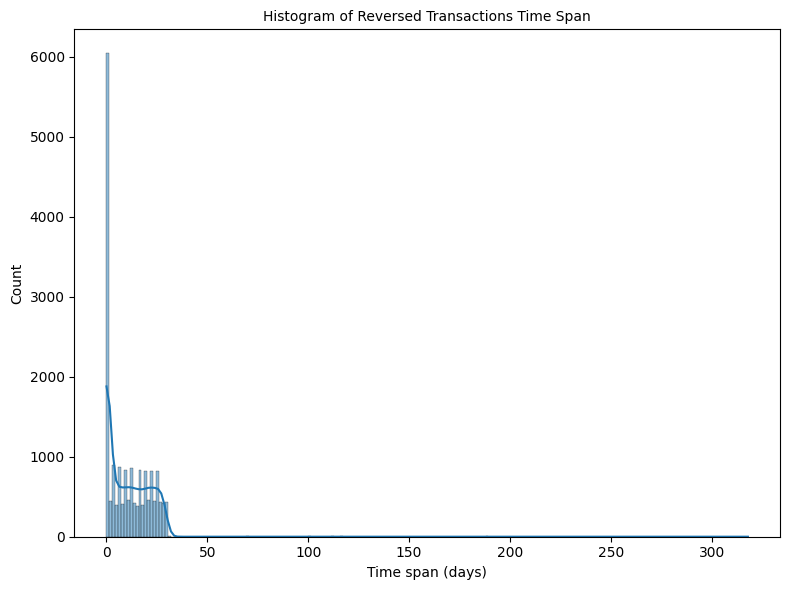

In [11]:

reversed_trans['time_span'] = ((reversed_trans.transactionDateTime_y - reversed_trans.transactionDateTime_x) / np.timedelta64(1, 'D')).astype(int)
plt.figure(figsize=(8, 6))
sns.histplot(reversed_trans.time_span, kde=True)
plt.xlabel('Time span (days)')
plt.title('Histogram of Reversed Transactions Time Span', fontsize=10)
plt.tight_layout()
plt.show()

Interesting, the typical range for a reversal is [0,50] days, with most of them happening on the same day

Let's now look at the distribution of reversals and multi-swipes among the different merchants

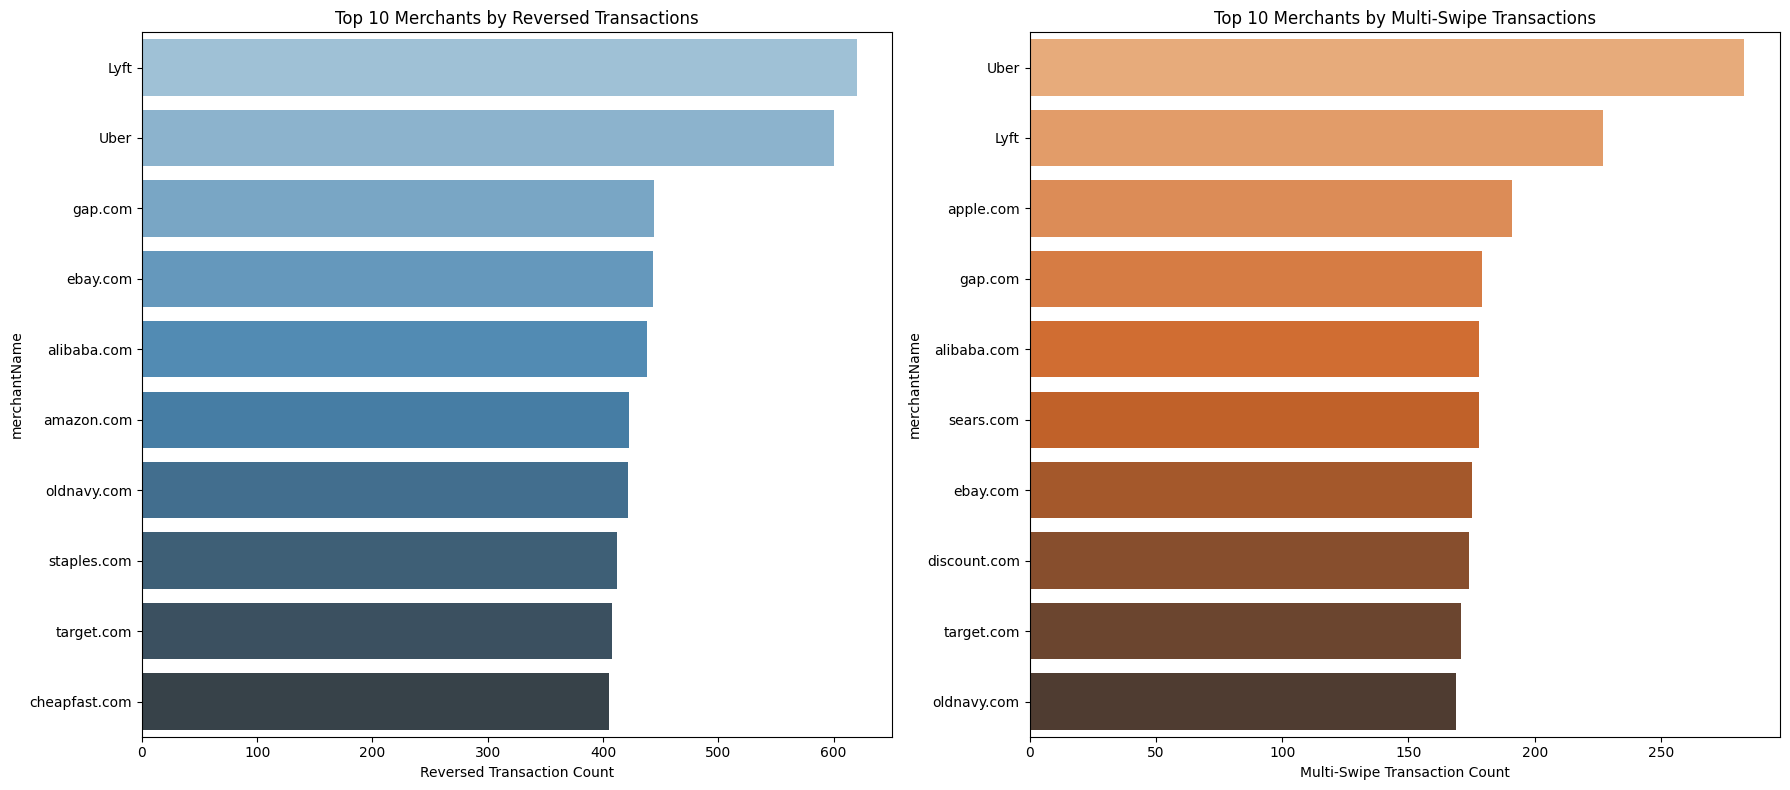

In [12]:
reversed_counts = reversed_trans.groupby('merchantName').size().reset_index(name='reversed_count')
multi_swipe_counts = multi_swipe.groupby('merchantName').size().reset_index(name='multi_swipe_count')

top_10_reversed = reversed_counts.nlargest(10, 'reversed_count')
top_10_multi_swipe = multi_swipe_counts.nlargest(10, 'multi_swipe_count')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

sns.barplot(x='reversed_count', y='merchantName', data=top_10_reversed, ax=ax[0], palette='Blues_d', hue='merchantName')
ax[0].set_xlabel('Reversed Transaction Count')
ax[0].set_title('Top 10 Merchants by Reversed Transactions')


sns.barplot(x='multi_swipe_count', y='merchantName', data=top_10_multi_swipe, ax=ax[1], palette='Oranges_d', hue='merchantName')
ax[1].set_xlabel('Multi-Swipe Transaction Count')
ax[1].set_title('Top 10 Merchants by Multi-Swipe Transactions')


plt.tight_layout()
plt.show()

Now this is really interesting! the top two merchants having highest reversals and multi-swipes are Uber and Lyft, suggesting that a lot of people face issues with rides. Others include Apple, indicating potential apple pay and susbcription issues. All in all, this is a good analysis of the day to day purchases that people make in day-to-day life- for rides, subscriptions, apparel (gap annd oldnavy), groceries (target), stationary (staples).

# Question 4

I want to add the multi-swipe and reversed transactions as flags to the data so we can use them for modelling

In [17]:

multi_swipe_keys = multi_swipe[['customerId', 'transactionAmount', 'merchantName', 'transactionDateTime']].copy()
multi_swipe_keys['isMultiSwipe'] = 1
df = df.merge(multi_swipe_keys, on=['customerId', 'transactionAmount', 'merchantName', 'transactionDateTime'], how='left')
df['isMultiSwipe'] = df['isMultiSwipe'].fillna(0).astype(int)


reversed_trans_keys = reversed_trans[['customerId', 'transactionAmount', 'merchantName', 'transactionDateTime_x']].copy()
reversed_trans_keys = reversed_trans_keys.rename(columns={'transactionDateTime_x': 'transactionDateTime'})
reversed_trans_keys['isReversed'] = 1
df = df.merge(reversed_trans_keys, on=['customerId', 'transactionAmount', 'merchantName', 'transactionDateTime'], how='left')
df['isReversed'] = df['isReversed'].fillna(0).astype(int)


In [112]:
print(df['isReversed'].value_counts())
print(df['isMultiSwipe'].value_counts())

isReversed
0    768367
1     17999
Name: count, dtype: int64
isMultiSwipe
0    778912
1      7454
Name: count, dtype: int64


Let's perform the feature pre-processing according to our key insights from question 2

In [18]:
# flagging mismatches between CVV and country of transaction
df['isCorrectCVV'] = (df['cardCVV'] == df['enteredCVV']).astype(int)
df.drop(['cardCVV', 'enteredCVV'], axis=1, inplace=True)


df['isSameCountry'] = (df['acqCountry'] == df['merchantCountryCode']).astype(int)
df.drop(['acqCountry', 'merchantCountryCode'], axis=1, inplace=True)

In [19]:
df.drop(['accountNumber'], axis=1, inplace=True)  # As customerId and accountNumber are the same

# convert to datetime type
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'])
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'])
df['currentExpDate'] = pd.to_datetime(df['currentExpDate'])

# computing new features which could be potential indicators
df['accountAge'] = (df['transactionDateTime'] - df['accountOpenDate']).dt.days
df['timeSinceLastAddressChange'] = (df['transactionDateTime'] - df['dateOfLastAddressChange']).dt.days
df['timeToExpiry'] = (df['currentExpDate'] - df['transactionDateTime']).dt.days

<ipython-input-19-2443fffbf98b>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['currentExpDate'] = pd.to_datetime(df['currentExpDate'])


In [20]:
# drop columns with empty fields
df.drop(['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd'], axis=1, inplace=True)
df.drop(['customerId'], axis=1, inplace=True)
# availableMoney = creditLimit - currentBalance, so we can drop that too and other date fields can be dropped since we have already computed temporal features from them
df = df.drop(['cardLast4Digits', 'merchantName', 'transactionDateTime',
          'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'availableMoney'], axis=1)

In [21]:

# Let's look at the distributions of categorical variables
print(df['merchantCategoryCode'].value_counts())
print(df['posEntryMode'].value_counts())
print(df['posConditionCode'].value_counts())
print(df['transactionType'].value_counts())



merchantCategoryCode
online_retail           202157
fastfood                112138
entertainment            80098
food                     75490
online_gifts             66240
rideshare                51136
hotels                   34097
fuel                     23910
subscriptions            22901
auto                     21651
health                   19092
personal care            18964
airline                  15412
mobileapps               14990
online_subscriptions     11067
furniture                 7432
food_delivery             6000
gym                       2209
cable/phone               1382
Name: count, dtype: int64
posEntryMode
05    315036
09    236482
02    195935
90     19576
80     15283
        4054
Name: count, dtype: int64
posConditionCode
01    628789
08    149635
99      7533
         409
Name: count, dtype: int64
transactionType
PURCHASE                745196
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
                           698
Name: count,

We can impute the missing values with the mode

In [22]:
df['posEntryMode'] = df['posEntryMode'].fillna(df['posEntryMode'].mode()[0])
df['posConditionCode'] = df['posConditionCode'].fillna(df['posConditionCode'].mode()[0])
df['transactionType'] = df['transactionType'].fillna(df['transactionType'].mode()[0])


Let's do one-hot encoding since the categorical features have no inherent order

In [23]:
# encoding categorical features
cat_cols = ['posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'transactionType']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

#  boolean features -> int
bool_cols = ['cardPresent', 'expirationDateKeyInMatch']
df[bool_cols] = df[bool_cols].astype(int)

In [119]:
df.head()

,creditLimit,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,isMultiSwipe,isReversed,isCorrectCVV,isSameCountry,...,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL
0,5000.0,98.55,0.0,0,0,False,0,0,1,1,...,False,False,False,False,False,True,False,False,True,False
1,5000.0,74.51,0.0,1,0,False,0,0,1,1,...,False,False,False,False,False,False,False,False,True,False
2,5000.0,7.47,0.0,0,0,False,0,0,1,1,...,True,False,False,False,False,False,False,False,True,False
3,5000.0,7.47,0.0,0,0,False,0,0,1,1,...,True,False,False,False,False,False,False,False,True,False
4,5000.0,71.18,0.0,1,0,False,0,0,1,1,...,False,False,False,False,False,False,False,False,True,False


Let's look at the correlation matrix of the numerical features to see if we can drop any highly collinear features

In [24]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numerical_cols].corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,creditLimit,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isMultiSwipe,isReversed,isCorrectCVV,isSameCountry,accountAge,timeSinceLastAddressChange,timeToExpiry
creditLimit,NaN,0.005582,0.653652,-0.003927,0.002391,0.001912,0.001319,0.001342,-0.001048,-0.061548,-0.062467,0.001461
transactionAmount,NaN,NaN,0.023906,0.037363,0.001751,0.007339,0.013568,0.000700,-0.000191,-0.007878,-0.028429,0.002074
currentBalance,NaN,NaN,NaN,-0.010528,-0.001284,0.005136,0.004172,0.003221,-0.000188,-0.081993,-0.169767,-0.004031
cardPresent,NaN,NaN,NaN,NaN,0.040393,0.005756,0.005134,0.002987,0.000145,0.020537,0.013712,0.000099
expirationDateKeyInMatch,NaN,NaN,NaN,NaN,NaN,0.000401,-0.003008,0.000113,-0.001894,0.001221,0.001015,0.000885
isMultiSwipe,NaN,NaN,NaN,NaN,NaN,NaN,-0.000142,-0.001187,0.000573,-0.002662,-0.004939,0.001418
isReversed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000684,-0.000663,-0.002525,-0.005738,0.001597
isCorrectCVV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000021,0.000046,-0.001247,0.001445
isSameCountry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000411,0.001809,-0.000641
accountAge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.585585,-0.013490


There's no features with correlation over a threshold of 0.9, so let us proceed

In [25]:
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, average_precision_score, make_scorer, classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [26]:
# prepare data by dropping target variable
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# scale numeric columns and split into train, test
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)





In [38]:
X_train_sampled, _, y_train_sampled, _ = train_test_split(
    X_train, y_train, train_size=0.2, stratify=y_train, random_state=42
) # since dataset is quite large


num_cols = X_train_sampled.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train_sampled[num_cols] = scaler.fit_transform(X_train_sampled[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_sampled, y_train_sampled)

In [39]:
print(y.value_counts())
print(y_train_resampled.value_counts())

isFraud
False    773949
True      12417
Name: count, dtype: int64
isFraud
False    123831
True     123831
Name: count, dtype: int64


In [35]:
X_train_resampled

,creditLimit,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isMultiSwipe,isReversed,isCorrectCVV,isSameCountry,accountAge,...,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL
0,0.370019,-0.364307,0.324053,-0.905486,-0.033377,-0.095201,-0.161033,0.090854,0.070942,-0.174794,...,False,False,True,False,False,False,False,False,True,False
1,-0.489058,-0.919241,-0.032739,-0.905486,-0.033377,-0.095201,-0.161033,0.090854,0.070942,-0.841279,...,False,False,False,False,False,True,False,False,True,False
2,0.370019,-0.457807,-0.503563,-0.905486,-0.033377,-0.095201,-0.161033,0.090854,0.070942,-0.510934,...,False,False,False,False,False,False,False,False,True,False
3,0.370019,-0.429110,-0.315801,-0.905486,-0.033377,-0.095201,-0.161033,0.090854,0.070942,-0.229851,...,False,False,False,False,False,False,False,False,True,False
4,0.799557,-0.393273,-0.527843,-0.905486,-0.033377,-0.095201,-0.161033,0.090854,0.070942,-0.519628,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24759,0.370019,-0.192305,-0.572994,1.104380,-0.033377,-0.095201,-0.161033,0.090854,0.070942,1.683205,...,False,False,False,False,False,False,False,False,True,False
24760,-0.489058,0.049046,-0.576955,-0.905486,-0.033377,-0.095201,-0.161033,0.090854,0.070942,0.751449,...,False,False,True,False,False,False,True,False,True,False
24761,0.188126,0.787753,-0.007949,-0.905486,-0.033377,-0.095201,-0.161033,0.090854,0.070942,1.424796,...,False,False,True,False,False,False,False,False,True,False
24762,-0.519803,0.554985,-0.366829,1.104380,-0.033377,-0.095201,-0.161033,0.090854,0.070942,-0.255471,...,False,False,False,False,False,False,False,False,True,False


In [36]:
y_train_resampled

,isFraud
0,False
1,False
2,False
3,False
4,False
...,...
24759,True
24760,True
24761,True
24762,True


Let's use Random Forest since Tree-based models are strong at handling imbalanced datasets and capturing complex relationships in the data. By controlling the depth of the tree, we can get a pretty good approximation of the training data and use it for prediction

In [42]:
rf_param_distributions = {
    'n_estimators': [50, 100, 150],
    'max_depth': range(1, 100, 10),
}

rf_clf = RandomForestClassifier(
    criterion='gini',
    random_state=42,
    n_jobs=-1,        # parallel processing ( since we have a large amount of data)
    verbose=1
)

rf_search = RandomizedSearchCV(
    rf_clf,
    param_distributions=rf_param_distributions,
    n_iter=4,         # reducing iterations
    cv=3,
    n_jobs=-1,
    random_state=42
)

rf_search.fit(X_train_resampled, y_train_resampled)
print("Random Forest Best Params:", rf_search.best_params_)



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.7s


Random Forest Best Params: {'n_estimators': 150, 'max_depth': 71}


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.4min finished


In [45]:
from sklearn.metrics import make_scorer, roc_auc_score, average_precision_score, precision_score, recall_score


Let's use area under curve (AUC) and Average Precision and Recall as the main scoring metrics here. Why?

They are perfect for measuring the model's ability to discriminate between fraudulent and non-fraudulent transactions across all thresholds, making it ideal for imbalanced datasets like fraud detection.


In [46]:
best_rf_clf = rf_search.best_estimator_

scoring_met = {
    'AUC': make_scorer(roc_auc_score),
    'Average Precision': make_scorer(average_precision_score),
    'accuracy': 'accuracy',
    'Precision': make_scorer(precision_score, pos_label=True),
    'Recall': make_scorer(recall_score, pos_label=True)
}

# 5-fold CV with the best random forest model
cross_val_results = cross_validate(
    best_rf_clf, X_train_resampled, y_train_resampled, cv=5, scoring=scoring_met, return_train_score=False
)


print(f"AUC: {cross_val_results['test_AUC'].mean():.4f}")
print(f"Average Precision: {cross_val_results['test_Average Precision'].mean():.4f}")
print(f"Accuracy: {cross_val_results['test_accuracy'].mean():.4f}")

best_rf_clf.fit(X_train_resampled, y_train_resampled)


y_pred = best_rf_clf.predict(X_test)


print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.5s
[Parall

AUC: 0.9881
Average Precision: 0.9803
Accuracy: 0.9881


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.4min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.0s



Classification Report on Test Set:
              precision    recall  f1-score   support

       False       0.99      0.95      0.97    154791
        True       0.05      0.15      0.07      2483

    accuracy                           0.94    157274
   macro avg       0.52      0.55      0.52    157274
weighted avg       0.97      0.94      0.95    157274



[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    3.2s finished


Recall looks very low, and we want to avoid the model being skewed in favor of the majority class, so let's look at thresholds to settle on an optimum recall.

In [48]:
probs = best_rf_clf.predict_proba(X_test)[:, 1]

for thresh in [0.5, 0.4, 0.3, 0.2, 0.1]:
    preds = (probs > thresh).astype(int)
    print(f"\nThreshold: {thresh}")
    print(classification_report(y_test, preds))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    3.2s finished



Threshold: 0.5
              precision    recall  f1-score   support

       False       0.99      0.95      0.97    154791
        True       0.05      0.15      0.07      2483

    accuracy                           0.94    157274
   macro avg       0.52      0.55      0.52    157274
weighted avg       0.97      0.94      0.95    157274


Threshold: 0.4
              precision    recall  f1-score   support

       False       0.99      0.90      0.94    154791
        True       0.04      0.26      0.07      2483

    accuracy                           0.89    157274
   macro avg       0.51      0.58      0.51    157274
weighted avg       0.97      0.89      0.93    157274


Threshold: 0.3
              precision    recall  f1-score   support

       False       0.99      0.80      0.88    154791
        True       0.03      0.40      0.06      2483

    accuracy                           0.79    157274
   macro avg       0.51      0.60      0.47    157274
weighted avg       0.97   

The recall skyrockets as you lower the threshold, meaning the model knows where the positives are => it's just unsure.

Precision drops but in domains like fraud detection, RECALL is often more critical, since we want more fraudulent cases to be flagged, so let's lower the threshold





Let's decide the optimum threshold by plotting the Precision-Recall curve

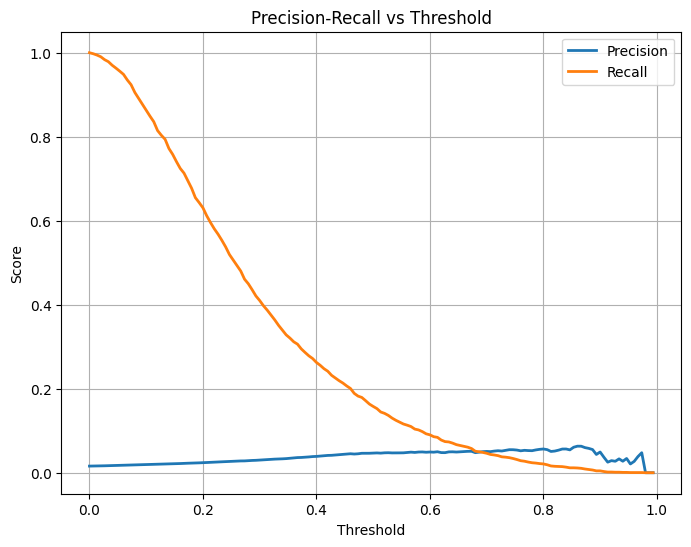

In [49]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, probs)


plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], label="Recall", linewidth=2)
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


The best threshold for flagging most of the fraudulent transactions seems to be 0.2, so let's try with that

In [50]:
probs = best_rf_clf.predict_proba(X_test)[:, 1]
preds = (probs > 0.2).astype(int)


print(f"Classification Report with Threshold 0.2:")
print(classification_report(y_test, preds))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    5.5s finished


Classification Report with Threshold 0.2:
              precision    recall  f1-score   support

       False       0.99      0.61      0.75    154791
        True       0.02      0.61      0.05      2483

    accuracy                           0.61    157274
   macro avg       0.51      0.61      0.40    157274
weighted avg       0.97      0.61      0.74    157274



Threshold 0.2 is better then the earlier Threshold 0.5 if maximizing recall (catching as many frauds as possible) is the primary goal, even at the cost of precision. This is typical in fraud detection systems where false negatives (missing frauds) can be much costlier than false positives.



In [51]:
import joblib
# saving random forest model
joblib.dump(best_rf_clf, 'best_rf_clf_model.pkl')
print("Model saved successfully!")

Model saved successfully!


## Let's also look at Gradient Boosting Classifier and XG Boosting classifier, so we can get a comprehensive view of the tree based methods

## Gradient Boosting Classifier

In [52]:
gb_param_distributions = {
    'n_estimators': [50, 100, 150],
    'max_depth': range(1, 10, 100),
}

gb_clf = GradientBoostingClassifier(random_state=42)


gb_search = RandomizedSearchCV(
    gb_clf,
    param_distributions=gb_param_distributions,
    n_iter=4,
    cv=3,
    n_jobs=-1,
    random_state=42
)


gb_search.fit(X_train_resampled, y_train_resampled)
print("Gradient Boosting Best Params:", gb_search.best_params_)


best_gb_clf = gb_search.best_estimator_


scoring_met = {
    'AUC': make_scorer(roc_auc_score),
    'Average Precision': make_scorer(average_precision_score),
    'accuracy': 'accuracy',
    'Precision': make_scorer(precision_score, pos_label=True),
    'Recall': make_scorer(recall_score, pos_label=True)
}

cross_val_results = cross_validate(
    best_gb_clf, X_train_resampled, y_train_resampled, cv=5, scoring=scoring_met, return_train_score=False
)

print(f"AUC: {cross_val_results['test_AUC'].mean():.4f}")
print(f"Average Precision: {cross_val_results['test_Average Precision'].mean():.4f}")
print(f"Accuracy: {cross_val_results['test_accuracy'].mean():.4f}")


best_gb_clf.fit(X_train_resampled, y_train_resampled)


y_pred_gb = best_gb_clf.predict(X_test)
print("\nClassification Report on Test Set (Gradient Boosting):")
print(classification_report(y_test, y_pred_gb))


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=4. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Gradient Boosting Best Params: {'n_estimators': 150, 'max_depth': 1}
AUC: 0.7419
Average Precision: 0.6757
Accuracy: 0.7419

Classification Report on Test Set (Gradient Boosting):
              precision    recall  f1-score   support

       False       0.99      0.67      0.80    154791
        True       0.03      0.65      0.06      2483

    accuracy                           0.67    157274
   macro avg       0.51      0.66      0.43    157274
weighted avg       0.98      0.67      0.79    157274



In [53]:

joblib.dump(best_rf_clf, 'best_gb_clf_model.pkl')
print("Model saved successfully!")

Model saved successfully!


In [56]:
probs = best_gb_clf.predict_proba(X_test)[:, 1]

for thresh in [0.5, 0.4, 0.3, 0.2, 0.1]:
    preds = (probs > thresh).astype(int)
    print(f"\nThreshold: {thresh}")
    print(classification_report(y_test, preds))


Threshold: 0.5
              precision    recall  f1-score   support

       False       0.99      0.67      0.80    154791
        True       0.03      0.65      0.06      2483

    accuracy                           0.67    157274
   macro avg       0.51      0.66      0.43    157274
weighted avg       0.98      0.67      0.79    157274


Threshold: 0.4
              precision    recall  f1-score   support

       False       0.99      0.47      0.64    154791
        True       0.02      0.81      0.05      2483

    accuracy                           0.47    157274
   macro avg       0.51      0.64      0.34    157274
weighted avg       0.98      0.47      0.63    157274


Threshold: 0.3
              precision    recall  f1-score   support

       False       0.99      0.28      0.44    154791
        True       0.02      0.90      0.04      2483

    accuracy                           0.29    157274
   macro avg       0.51      0.59      0.24    157274
weighted avg       0.98   

## XGBoost Classifier

In [54]:
xgb_param_distributions = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],

}

xgb_clf = xgb.XGBClassifier(random_state=42)


xgb_search = RandomizedSearchCV(
    xgb_clf,
    param_distributions=xgb_param_distributions,
    n_iter=4,
    cv=3,
    n_jobs=-1,
    random_state=42
)


xgb_search.fit(X_train_resampled, y_train_resampled)
print("XGBoost Best Params:", xgb_search.best_params_)


best_xgb_clf = xgb_search.best_estimator_


scoring_met = {
    'AUC': make_scorer(roc_auc_score),
    'Average Precision': make_scorer(average_precision_score),
    'accuracy': 'accuracy',
    'Precision': make_scorer(precision_score, pos_label=True),
    'Recall': make_scorer(recall_score, pos_label=True)
}

cross_val_results = cross_validate(
    best_xgb_clf, X_train_resampled, y_train_resampled, cv=5, scoring=scoring_met, return_train_score=False
)

print(f"AUC: {cross_val_results['test_AUC'].mean():.4f}")
print(f"Average Precision: {cross_val_results['test_Average Precision'].mean():.4f}")
print(f"Accuracy: {cross_val_results['test_accuracy'].mean():.4f}")

best_xgb_clf.fit(X_train_resampled, y_train_resampled)


y_pred_xgb = best_xgb_clf.predict(X_test)
print("\nClassification Report on Test Set (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

XGBoost Best Params: {'n_estimators': 100, 'learning_rate': 0.1}
AUC: 0.9005
Average Precision: 0.8655
Accuracy: 0.9005

Classification Report on Test Set (XGBoost):
              precision    recall  f1-score   support

       False       0.99      0.92      0.95    154791
        True       0.05      0.24      0.08      2483

    accuracy                           0.91    157274
   macro avg       0.52      0.58      0.52    157274
weighted avg       0.97      0.91      0.94    157274



In [57]:
probs = best_xgb_clf.predict_proba(X_test)[:, 1]

for thresh in [0.5, 0.4, 0.3, 0.2, 0.1]:
    preds = (probs > thresh).astype(int)
    print(f"\nThreshold: {thresh}")
    print(classification_report(y_test, preds))


Threshold: 0.5
              precision    recall  f1-score   support

       False       0.99      0.92      0.95    154791
        True       0.05      0.24      0.08      2483

    accuracy                           0.91    157274
   macro avg       0.52      0.58      0.52    157274
weighted avg       0.97      0.91      0.94    157274


Threshold: 0.4
              precision    recall  f1-score   support

       False       0.99      0.87      0.93    154791
        True       0.04      0.36      0.08      2483

    accuracy                           0.87    157274
   macro avg       0.52      0.62      0.50    157274
weighted avg       0.97      0.87      0.91    157274


Threshold: 0.3
              precision    recall  f1-score   support

       False       0.99      0.80      0.89    154791
        True       0.04      0.51      0.07      2483

    accuracy                           0.80    157274
   macro avg       0.51      0.65      0.48    157274
weighted avg       0.98   

In [55]:

joblib.dump(best_rf_clf, 'best_xgb_clf_model.pkl')
print("Model saved successfully!")

Model saved successfully!


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    3.2s finished


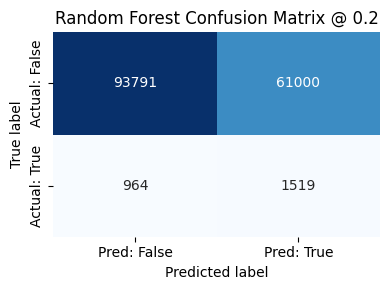

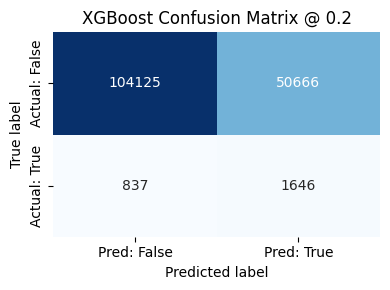

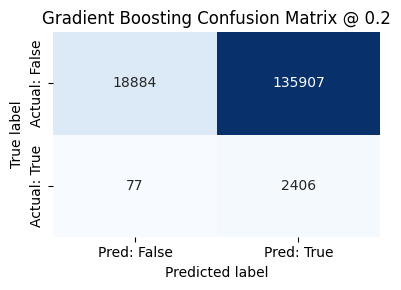

In [59]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: False', 'Pred: True'],
                yticklabels=['Actual: False', 'Actual: True'])
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

threshold = 0.2

# Random Forest
rf_probs = best_rf_clf.predict_proba(X_test)[:, 1]
rf_preds = (rf_probs > threshold).astype(int)
plot_conf_matrix(y_test, rf_preds, f'Random Forest Confusion Matrix @ {threshold}')

# XGBoost
xgb_probs = best_xgb_clf.predict_proba(X_test)[:, 1]
xgb_preds = (xgb_probs > threshold).astype(int)
plot_conf_matrix(y_test, xgb_preds, f'XGBoost Confusion Matrix @ {threshold}')

# Gradient Boosting
gb_probs = best_gb_clf.predict_proba(X_test)[:, 1]
gb_preds = (gb_probs > threshold).astype(int)
plot_conf_matrix(y_test, gb_preds, f'Gradient Boosting Confusion Matrix @ {threshold}')

# Key Insights
XGBoost consistently outperforms the others in F1-score (especially at lower thresholds).

-  At thresholds 0.3 to 0.1, it has the best balance of precision and recall.

Holds higher accuracy than Gradient Boosting, while approaching its recall.

Gradient Boosting has the highest recall, but sacrifices accuracy and precision significantly.

- It may be suitable for max recall at all costs (e.g., in a safety-critical system).

Random Forest has the highest accuracy, but lower recall.

- More conservative in flagging fraud, resulting in many false negatives.

## Engineering pipeline
We could implement a silent alert system with the thresholds!
Idea-

0.2 or 0.3: These thresholds give you more recall (catching most fraudulent transactions). We could use these to issue silent alerts, where flagged transactions are reviewed later or through manual processes. These alerts can be sent to a backend system or flagged for manual investigation. It helps to monitor potential fraud without immediately stopping the transaction.

0.5: This threshold is more conservative, used for real-time alerts, where fraud is immediately blocked or flagged for more urgent attention. It's used when you are comfortable with losing some fraudulent transactions to maintain a lower number of false positives.

Example Process-
Low Threshold (0.2 / 0.3): Flag transactions as suspicious.

Action: Send a silent alert for review later.

Moderate Threshold (0.5): Flag transactions as fraudulent with higher confidence.

Action: Immediately block the transaction or notify the user.

## Future Work


- Try techniques like class weighting, or ensemble methods with under/oversampling.

- Optimize threshold selection based on business metric (e.g., F2-score or cost function)

- Instead of fixed thresholds like 0.2 or 0.5, find the threshold that gives the best cost-benefit tradeoff.

- Add or transform features based on improved domain insights.

- Use SHAP or LIME to see what drives "True" predictions.

- Deploy models and set up monitoring

- If real-time use is the goal, build a pipeline for scoring and monitoring performance over time.